In [1]:
import pandas as pd

# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('pickle/data_clean_r4.pkl')
data_clean

,content
0,so sorry to tell you that you have stage ovari...
1,if you buy something through link on this page...
2,cluster of more than pneumonia in the central ...
3,at hong international airport are being for my...
4,the finding that the outbreak of viral pneumon...
...,...
55532,good morning said the government had only ever...
55533,forward his future at despite talk that is con...
55534,the deal agreed by new jersey new york and isl...
55535,around the world have seen major and amid the ...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   norm='l1', # ELL - ONE
                                   use_idf=False)
tfidf = tfidf_vectorizer.fit_transform(data_clean.content)

In [21]:
import pickle

kmeans = KMeans(n_clusters=2).fit(tfidf)
pickle.dump(kmeans, open("pickle/kmeans.pkl", "wb"))

In [10]:
lines_for_predicting = ["tf and idf is awesome!", "so sorry to tell you that you have stage two cancer"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

array([0, 0], dtype=int32)

In [16]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
my,0.574563
cancer,0.311175
and,0.246626
me,0.211389
the,0.197347
...,...
foil,0.000000
fogle,0.000000
foghorn,0.000000
foggy,0.000000


In [17]:
pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

,aa,aal,aam,aba,aback,abacus,abalone,abandon,abandoned,abandonment,...,zoonosis,zoonotic,zorro,zoster,zowie,zucchini,zwanziger,zygomatic,αcoronavirus,βcoronavirus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.064998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_pickle('pickle/data_clean_r4.pkl')
data.head()

,content
0,so sorry to tell you that you have stage ovari...
1,if you buy something through link on this page...
2,cluster of more than pneumonia in the central ...
3,at hong international airport are being for my...
4,the finding that the outbreak of viral pneumon...


In [5]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data.content)
text = tfidf.transform(data.content)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters
Fit 74 clusters
Fit 76 clusters
Fit 78 clusters
Fit 80 clusters
Fit 82 clusters
Fit 84 clusters
Fit 86 clusters
Fit 88 clusters
Fit 90 clusters
Fit 92 clusters
Fit 94 clusters
Fit 96 clusters
Fit 98 clusters
Fit 100 clusters


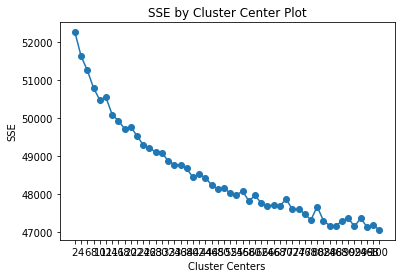

In [11]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 100)